## Evaluating Regression Models

### What
- Since models are approximations of reality, we're measuring how closely our linear models approximate reality.
- With evaluating regression models, we'll calculate this closeness by measuring the error, which is the distance between the regression line (prediction) and actual data points.

### Why

Techniques in this lesson answer the following questions:
- How do we know if our model is good enough?
- How do we evaluate our model?
- Is our model valuable?
- Are our features valuable?

### How - what is our approach?
Prerequisites
- Establish a baseline (often the average of the target)
- Build a super simple model (or isolate the model we're evaluating)
- Calculate baseline and model residuals

Evaluate the model
- Calculate SSE, MSE, and RMSE (Root Mean Squared Error)
- Determine if the model is significant
- Determine if the features are significant

### When do we evaluate a model?
- As soon as we've got a super basic model, it's important to know if it beats baseline.
- If so, we'll keep on modeling, making new models, tuning, etc...
- If not, maybe a different model or different feature(s) will help.

### Vocabulary
- Baseline is often the mean, but could also be the median or "last year's" model, in practice.
- Line of best fit = regression line == linear model that best fits the data points.
- Residuals: for each data point, the vertical distance between each predicted $\hat{y}$ and actual $y$ values.. - This is $\hat{y} - y$
- Linear model = a line that best approximates reality.
- $y = mx + b$ is a linear model
- SSE = sum of squared errors
- MSE = mean squared error
- RMSE = root mean squared error = sqrt(MSE)
- Taking the square root means we get same units as y

In [2]:
# imports 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

from statsmodels.formula.api import ols

In [3]:
# acquiring sales data from url
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

# creating new column that holds log rainfall value
df["log_rainfall"] = np.log(df.rainfall)

df.head()

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000


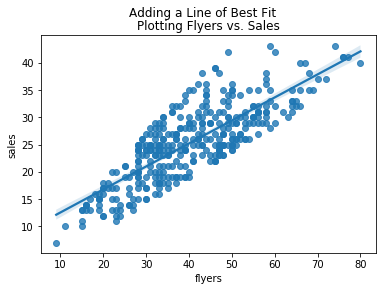

In [4]:
# creating regplot of flyers vs. sales including line of best fit aka regression line
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")

sns.regplot(x="flyers", y="sales", data=df)
plt.show()

### Okay, so .regplot can add a line of best fit
- But is this model any good?
- Is it better than a baseline?
- How do we get a baseline?
- And is this this model significant?
- What does it mean that the points are spread out from the line?
- What does it mean if they're close to the line?

### The Evaluation Playbook is here to help!
Prerequisites:
- Establish a baseline
- Produce a super simple model
- Calculate the model and baseline residuals

Evaluation:
- Calculate evaluation metrics from residuals
- Determine if the model is significant
- Determine if the features are significant (we'll do this later)

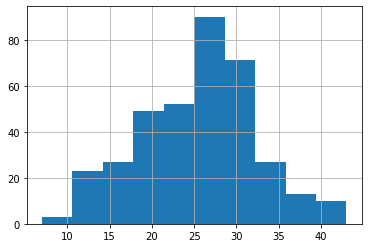

In [5]:
# creating historgram of sales
df.sales.hist()

In [6]:
# Pre-requisite Part 1 - establish a baseline. 
# sales are normally distrbuted so we can use the mean as our baseline
# if there were several outliers we may consider median since a median value is less 
# sensitive to outliers
baseline = df.sales.mean()

In [7]:
# Pre-requisite Part 2 - build simple linear model

# importing ordinary least squares
from statsmodels.formula.api import ols

# creating ols model and fitting to sales and flyers data
model = ols('sales ~ flyers', df).fit()

In [9]:
# Pre-requisite Part 3 - Calculate residuals

# creating empty df
evaluate = pd.DataFrame()

# feature = x = flyers
evaluate["x"] = df.flyers

# target variable = y = sales
evaluate["y"] = df.sales

# creating baseline column of mean sales value
evaluate["baseline"] = df.sales.mean()

# creating yhat column that holds model predictions for sales
evaluate["yhat"] = model.predict()

# creating new column to hold baseline residuals 
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# creating new column to hold model residuals 
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head(4)

,x,y,baseline,yhat,baseline_residual,model_residual
0,15,10,25.323288,14.673754,15.323288,4.673754
1,15,13,25.323288,14.673754,12.323288,1.673754
2,27,15,25.323288,19.727926,10.323288,4.727926
3,28,17,25.323288,20.149107,8.323288,3.149107


### So how do we answer if the model beats the baseline
- Our metric will be the sum of squared errors
- We sum up the squares of every residual from baseline
- We sum up the squares of every residual from model
- Then we compare

Here's the quick and easy arithmetic answer:
- Square the baseline_residual to get the baseline_sse
- Square the model_residual to get the model_sse

In [12]:
# calculatin model and baseline sse values 
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

# if our models sse value is lower, print message that it beat the baseline
if model_sse < baseline_sse:
    print("Our model beats the baseline")
    
# otherwise, print that the baseline beat our model
else:
    print("Our baseline is better than the model.")

# display sse values
print("\nBaseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline

Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


### Now let's consider evaluation metrics
Sum of Square Error (SSE)
- Squaring makes larger errors more significant
- Squaring also removes negative residuals

Mean Squared Error (MSE)
- Average of all the squared errors

Root Mean Squared Error (RMSE)
- Super useful
- Converts back to the same units

In [14]:
# importing mean squared error and square root functions
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculating model sse
model_sse = (evaluate.model_residual**2).sum()

# calculating model mse
mse = mean_squared_error(evaluate.y, evaluate.yhat)

# calculating rmse
rmse = sqrt(mse)

# displaying values and descriptive message
print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


### Evaluating Model Significance
$R^2$ tells you how well your model fits the data by measuring the strength of the relationship between your model and the dependent variable. However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. It indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.

If the overall F-test is significant (evident through the p-value of the F statistic), you can conclude that $R^2$ does not equal zero, and the correlation between the model and dependent variable is statistically significant.

In [15]:
# calculating r^2
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648


We will now compute the p-value to determine if our test is significant, i.e. can we trust that the explained variance means what we think it means? If we have a high $R^2$, does it really mean that there is correlation? If we have only two datapoints, then no

In [16]:
# calculating model p value of being significant
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  2.193718738113383e-84


In [18]:
# since p value is below .05 (alpha), our model is significant
f_pval < .05

True

- Null hypothesis is that a model not built w/ the independent variables explains the relationship
- Alternative hypothesis is that our model built on independent varibles explains the relationship, validates that - $R^2$
- If p is less than 0.05, you're OK to conclude that your regression model fits the data better than the model with no independent variables, meaning the independent variables in your model improve the fit.
- If greater than 0.05, it's probably better to stop using this set of features.
- Basically, if the p is low, we can reject the null hypothesis.
- And that means we can accept the model as statistically significant

In [19]:
# creating function to plot residuals 
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

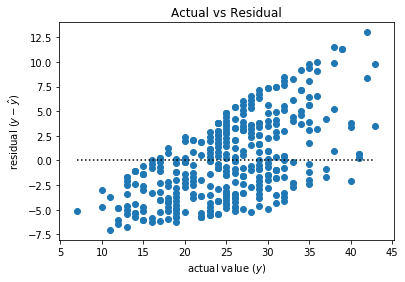

In [22]:
# plotting residuals using function
plot_residuals(evaluate.y, evaluate.yhat)